<a href="https://colab.research.google.com/github/arielpincayy/Telco-Churn/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!rm -rf my_dir
! rm -rf my_dir_no_feature

In [ ]:
%pip install keras-tuner

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

file_path = '/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv'

df_data = pd.read_csv(file_path)

# **Analysis and Data transform**

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df_data.drop(columns=['customerID'], inplace=True)

In [ ]:
df_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_data['TotalCharges'] = pd.to_numeric(df_data['TotalCharges'], errors='coerce')
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df_data['TotalCharges'] = df_data['TotalCharges'].fillna(np.mean(df_data['TotalCharges']))

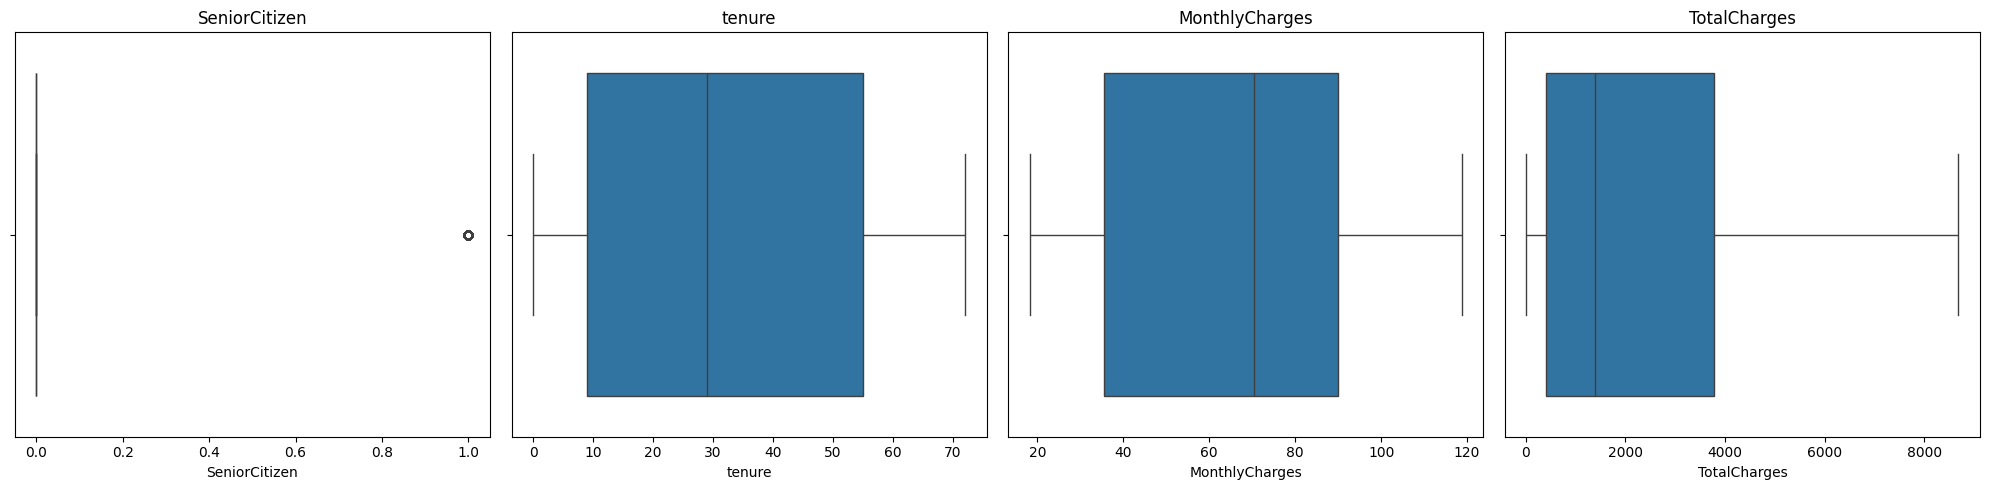

In [ ]:
num_cols = df_data.select_dtypes(exclude=['object']).columns
num_plots = len(num_cols)
num_cols_per_row = 4

# Calculate the number of rows needed, ensuring it's at least 1
num_rows = max(1, (num_plots + num_cols_per_row - 1) // num_cols_per_row)

fig, axes = plt.subplots(nrows=num_rows,
                         ncols=num_cols_per_row,
                         figsize=(20, 5 * num_rows))

for i, col in enumerate(num_cols):
    row = i // num_cols_per_row
    col_idx = i % num_cols_per_row
    sns.boxplot(x=df_data[col], ax=axes[row, col_idx] if num_rows > 1 else axes[col_idx])

    # Set title for the subplot
    (axes[row, col_idx] if num_rows > 1 else axes[col_idx]).set_title(col)

# Hide any empty subplots
for i in range(num_plots, len(axes.flat) if num_rows > 1 else num_cols_per_row): # Check if axes is 2D
    (axes.flat[i] if num_rows > 1 else axes[i]).set_visible(False) # Access and hide subplots correctly

plt.tight_layout()
plt.show()

In [ ]:
df_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
cat_cols = df_data.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"{col}: {df_data[col].unique()}")
    #Percentage per categ per feature
    print(f"{col}: {df_data[col].value_counts()}")
    print("\n")

gender: ['Female' 'Male']
gender: gender
Male      3555
Female    3488
Name: count, dtype: int64


Partner: ['Yes' 'No']
Partner: Partner
No     3641
Yes    3402
Name: count, dtype: int64


Dependents: ['No' 'Yes']
Dependents: Dependents
No     4933
Yes    2110
Name: count, dtype: int64


PhoneService: ['No' 'Yes']
PhoneService: PhoneService
Yes    6361
No      682
Name: count, dtype: int64


MultipleLines: ['No phone service' 'No' 'Yes']
MultipleLines: MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


InternetService: ['DSL' 'Fiber optic' 'No']
InternetService: InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineSecurity: OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


OnlineBackup: ['Yes' 'No' 'No internet service']
OnlineBackup: Onl

In [ ]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_cols:
    unique_vals = df_data[col].unique()
    df_data[col] = df_data[col].map({unique_vals[0]: 0, unique_vals[1]: 1})
    df_data[col] = df_data[col].astype(np.int8)

In [ ]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df_data.select_dtypes(include=['object']).columns

for col in cat_cols:
    le = LabelEncoder()
    df_data[col + '_int'] = le.fit_transform(df_data[col])

    df_data[[f'{col}_bit1', f'{col}_bit0']] = df_data[col + '_int'].apply(
        lambda x: pd.Series(list(f"{x:02b}"))
    ).astype(np.int8)

    df_data.drop([col, col + '_int'], axis=1, inplace=True)

df_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_bit1,TechSupport_bit0,StreamingTV_bit1,StreamingTV_bit0,StreamingMovies_bit1,StreamingMovies_bit0,Contract_bit1,Contract_bit0,PaymentMethod_bit1,PaymentMethod_bit0
0,0,0,0,0,1,0,0,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,0,34,1,1,56.95,1889.50,0,...,0,0,0,0,0,0,0,1,1,1
2,1,0,1,0,2,1,0,53.85,108.15,1,...,0,0,0,0,0,0,0,0,1,1
3,1,0,1,0,45,0,1,42.30,1840.75,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,1,0,2,1,0,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0


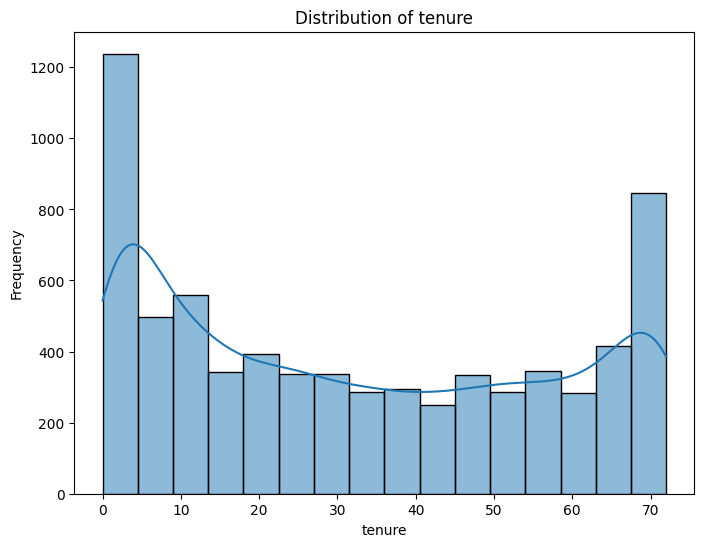

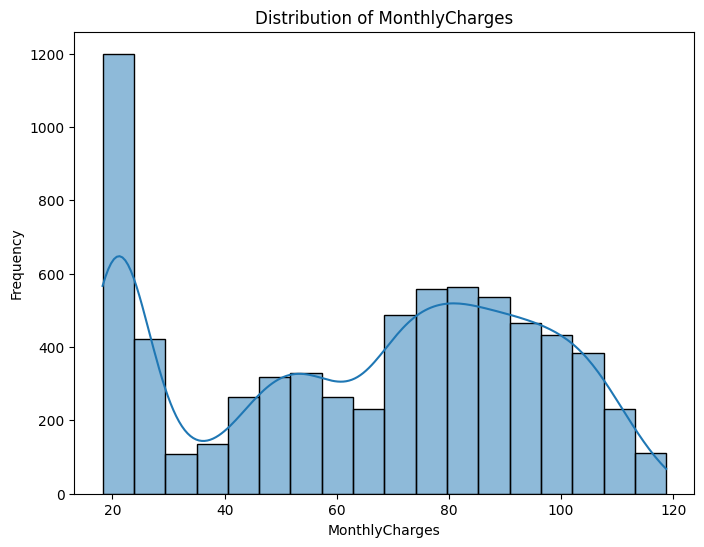

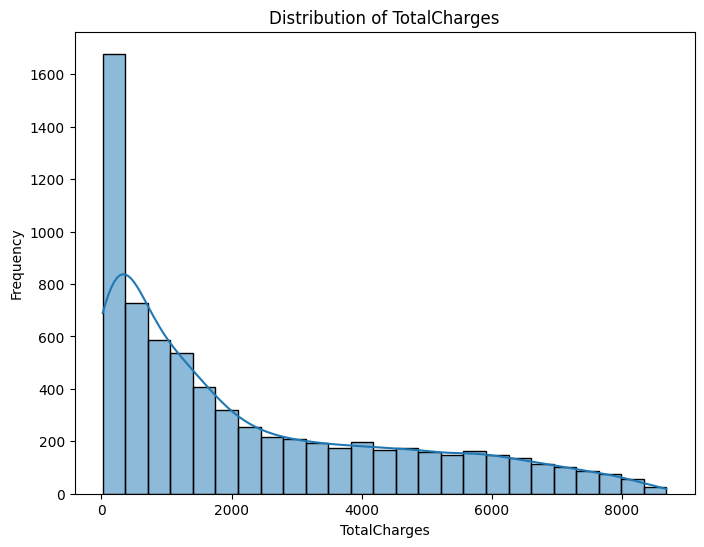

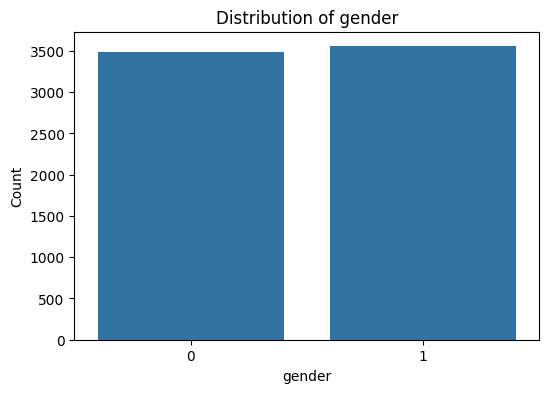

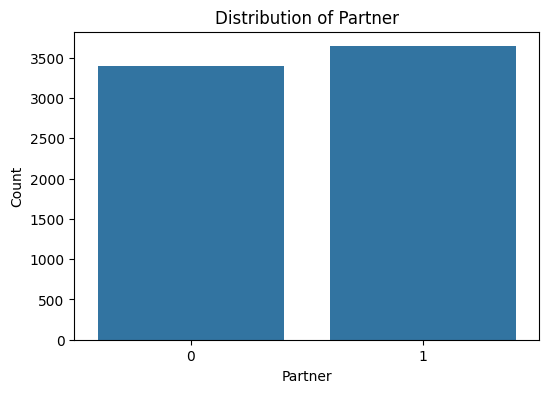

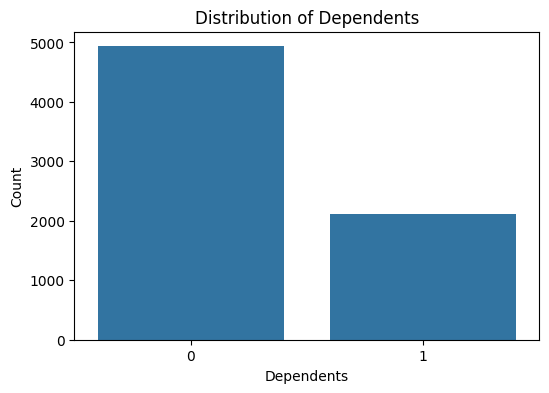

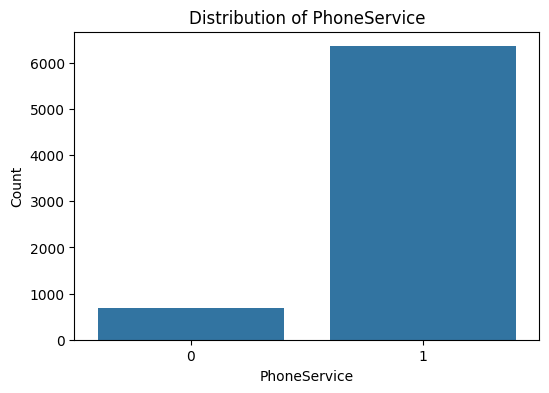

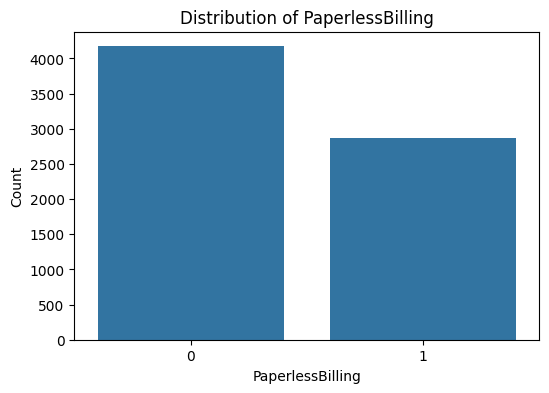

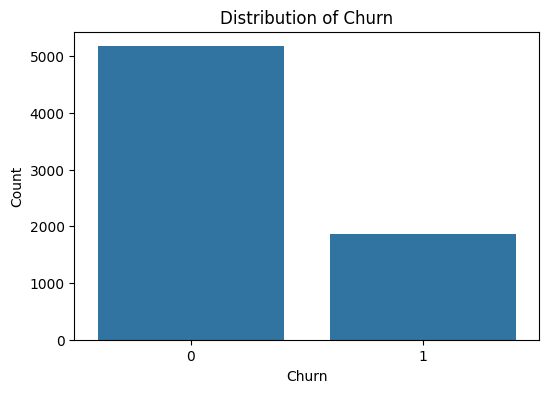

In [ ]:
# Visualize the distributions of numerical features using histograms
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Visualize the distributions of binary features using countplots
for col in binary_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df_data[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()

df_data[numerical_cols] = scaler.fit_transform(df_data[numerical_cols])

df_data.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_bit1,TechSupport_bit0,StreamingTV_bit1,StreamingTV_bit0,StreamingMovies_bit1,StreamingMovies_bit0,Contract_bit1,Contract_bit0,PaymentMethod_bit1,PaymentMethod_bit0
0,0,0,0,0,-1.277445,0,0,-1.160323,-0.994971,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,0,0.066327,1,1,-0.259629,-0.173876,0,...,0,0,0,0,0,0,0,1,1,1
2,1,0,1,0,-1.236724,1,0,-0.362660,-0.960399,1,...,0,0,0,0,0,0,0,0,1,1
3,1,0,1,0,0.514251,0,1,-0.746535,-0.195400,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,1,0,-1.236724,1,0,0.197365,-0.941193,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_data.to_csv('df_cleaned.csv', index=False)

# **Test**

In [ ]:
from tensorflow.keras import backend as K

def f1_score(y_true, y_pred):
    # Cast y_true to float32 to match y_pred's type
    y_true = K.cast(y_true, 'float32')
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true * y_pred, 'float'), axis=0)
    fp = K.sum(K.cast((1 - y_true) * y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true * (1 - y_pred), 'float'), axis=0)

    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())

    f1 = 2 * precision * recall / (precision + recall + K.epsilon())
    return K.mean(f1)

In [ ]:
import kerastuner as kt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score as sk_f1_score

# Separate features (X) and target (y)
X = df_data.drop('Churn', axis=1)
y = df_data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 5)):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                        activation=hp.Choice('activation_' + str(i), ['relu', 'tanh', 'sigmoid'])))
        model.add(Dropout(rate=hp.Float('dropout_' + str(i), 0.0, 0.5, step=0.1)))

    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd']),
                  loss='binary_crossentropy',
                  metrics=[f1_score])  # Use custom f1_score metric

    return model


tuner = kt.BayesianOptimization(
    build_model,
    objective='val_f1_score',  # Optimize based on validation f1_score
    max_trials=10,  # Adjust the number of trials as needed
    executions_per_trial=2,
    directory='my_dir_no_feature',
    project_name='churn_tuning')

tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

best_hps.values

Trial 10 Complete [00h 00m 22s]
val_f1_score: 0.10994266718626022

Best val_f1_score So Far: 0.0
Total elapsed time: 00h 05m 16s


{'num_layers': 3,
 'units_0': 448,
 'activation_0': 'relu',
 'dropout_0': 0.4,
 'units_1': 128,
 'activation_1': 'sigmoid',
 'dropout_1': 0.30000000000000004,
 'optimizer': 'sgd',
 'units_2': 160,
 'activation_2': 'relu',
 'dropout_2': 0.30000000000000004}

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import EarlyStopping

# Build the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)

model.compile(optimizer=best_hps.get('optimizer'), # Use best optimizer from tuning
              loss='binary_crossentropy',
              metrics=['accuracy', 'AUC', 'Precision', 'Recall'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=150, validation_split=0.2, callbacks=[early_stopping])

loss, accuracy, auc, precision, recall = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

print(classification_report(y_test, y_pred_classes))

conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
conf_matrix

Epoch 1/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - AUC: 0.5252 - Precision: 0.3083 - Recall: 0.1487 - accuracy: 0.6791 - loss: 0.6241 - val_AUC: 0.7396 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.7507 - val_loss: 0.5535
Epoch 2/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.5295 - Precision: 0.3554 - Recall: 0.0153 - accuracy: 0.7257 - loss: 0.5965 - val_AUC: 0.7799 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.7507 - val_loss: 0.5485
Epoch 3/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.5255 - Precision: 0.1025 - Recall: 0.0025 - accuracy: 0.7329 - loss: 0.5863 - val_AUC: 0.7963 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.7507 - val_loss: 0.5441
Epoch 4/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.5514 - Precision: 0.4276 - Recall: 0.0125 - accuracy: 0.7173 - loss: 0.5954 - val_AUC: 0.8030 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.7507 - val_loss: 0.

array([[940,  96],
       [154, 219]])

# **Feature selection**

In [ ]:
#Chi-2 to get the statistic dependency
import pandas as pd
from scipy.stats import chi2_contingency
categorical_cols = df_data.select_dtypes(include=[np.int8]).columns.tolist()

chi2_results = {}
for col in categorical_cols:
    contingency_table = pd.crosstab(df_data[col], df_data['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results[col] = {'chi2': chi2, 'p-value': p}

chi2_df = pd.DataFrame(chi2_results).T

chi2_df.sort_values(by='p-value')

,chi2,p-value
Churn,7037.871379,0.000000e+00
InternetService_bit0,666.808021,4.940476e-147
Contract_bit1,641.828115,1.337680e-141
InternetService_bit1,364.519799,2.920300e-81
OnlineBackup_bit0,364.519799,2.920300e-81
DeviceProtection_bit0,364.519799,2.920300e-81
TechSupport_bit0,364.519799,2.920300e-81
OnlineSecurity_bit0,364.519799,2.920300e-81
StreamingTV_bit0,364.519799,2.920300e-81
StreamingMovies_bit0,364.519799,2.920300e-81


In [ ]:
df_data.drop(columns=["gender", "MultipleLines_bit1", "PhoneService", "MultipleLines_bit0"], inplace=True)

In [ ]:
df_data.head()

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_bit1,InternetService_bit0,...,TechSupport_bit1,TechSupport_bit0,StreamingTV_bit1,StreamingTV_bit0,StreamingMovies_bit1,StreamingMovies_bit0,Contract_bit1,Contract_bit0,PaymentMethod_bit1,PaymentMethod_bit0
0,0,0,0,-1.277445,0,-1.160323,-0.994971,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0.066327,1,-0.259629,-0.173876,0,0,0,...,0,0,0,0,0,0,0,1,1,1
2,0,1,0,-1.236724,0,-0.362660,-0.960399,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,1,0,0.514251,1,-0.746535,-0.195400,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,1,0,-1.236724,0,0.197365,-0.941193,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
churn_counts = df_data['Churn'].value_counts(normalize=True) * 100

print("Percentage of Churn values:")
churn_counts


Percentage of Churn values:


,proportion
Churn,
0,73.463013
1,26.536987


In [ ]:
from sklearn.model_selection import train_test_split

X = df_data.drop('Churn', axis=1)
y = df_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5634, 25) (1409, 25) (5634,) (1409,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar y entrenar el modelo RandomForest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importances = rf_model.feature_importances_

# Crear un DataFrame para visualizar las importancias
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Definir un umbral para eliminar características (ajusta según sea necesario)
threshold = 0.04

# Obtener las características a eliminar
features_to_remove = importance_df[importance_df['Importance'] < threshold]['Feature'].tolist()

# Eliminar las características de X_train y X_test
X_train = X_train.drop(columns=features_to_remove)
X_test = X_test.drop(columns=features_to_remove)

print(f"Características eliminadas: {features_to_remove}")
print(X_train.shape, X_test.shape)


Características eliminadas: ['Contract_bit1', 'PaymentMethod_bit1', 'OnlineSecurity_bit1', 'PaperlessBilling', 'Partner', 'PaymentMethod_bit0', 'TechSupport_bit1', 'OnlineBackup_bit1', 'Contract_bit0', 'SeniorCitizen', 'Dependents', 'DeviceProtection_bit1', 'StreamingMovies_bit1', 'StreamingTV_bit1', 'StreamingTV_bit0', 'OnlineSecurity_bit0', 'InternetService_bit1', 'TechSupport_bit0', 'OnlineBackup_bit0', 'StreamingMovies_bit0', 'DeviceProtection_bit0']
(5634, 4) (1409, 4)


In [ ]:
df_data.drop(columns=features_to_remove)

,tenure,MonthlyCharges,TotalCharges,Churn,InternetService_bit0
0,-1.277445,-1.160323,-0.994971,0,0
1,0.066327,-0.259629,-0.173876,0,0
2,-1.236724,-0.362660,-0.960399,1,0
3,0.514251,-0.746535,-0.195400,0,0
4,-1.236724,0.197365,-0.941193,1,1
...,...,...,...,...,...
7038,-0.340876,0.665992,-0.129281,0,0
7039,1.613701,1.277533,2.242808,0,1
7040,-0.870241,-1.168632,-0.855182,0,0
7041,-1.155283,0.320338,-0.872777,1,1


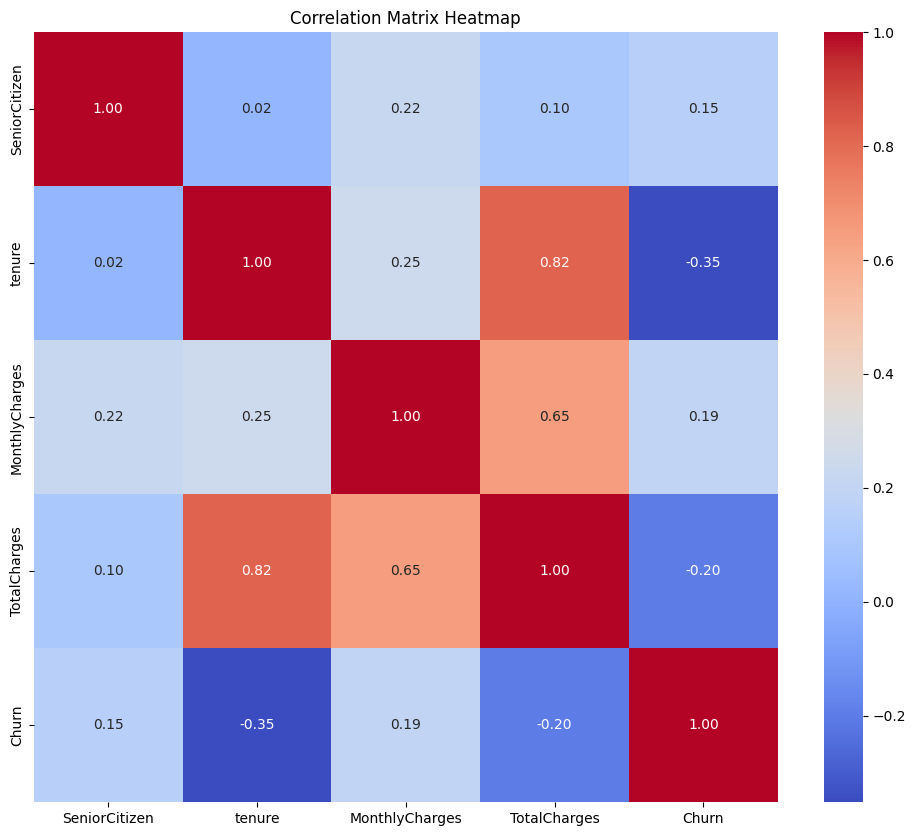

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegurar que 'Churn' es numérica
df_data['Churn'] = df_data['Churn'].astype(int)

# Calcular la matriz de correlación
correlation_matrix = df_data.select_dtypes(include=['float', 'int']).corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


# **Balancing data**

In [ ]:
y_train.value_counts()

,count
Churn,
0,4138
1,1496


In [ ]:
from imblearn.over_sampling import SMOTENC

# Identificar las columnas categóricas para SMOTENC
categorical_cols_indices = [i for i, col in enumerate(X_train.columns) if X_train[col].dtype == np.int8]

# Aplicar SMOTENC
smote_nc = SMOTENC(categorical_features=categorical_cols_indices, sampling_strategy=0.4, random_state=42)
X_train, y_train = smote_nc.fit_resample(X_train, y_train)

print(y_train.value_counts())


Churn
0    4138
1    1655
Name: count, dtype: int64


# **Search the best hyperparameeters**

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(
        units=hp.Int('units_1', min_value=32, max_value=512, step=32),
        activation=hp.Choice('activation_1', ['relu', 'tanh', 'sigmoid']),
        input_shape=(X_train.shape[1],)
    ))
    model.add(keras.layers.Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))

    for i in range(hp.Int('n_layers', 1, 3)):
        model.add(keras.layers.Dense(
            units=hp.Int(f'units_{i+2}', min_value=32, max_value=512, step=32),
            activation=hp.Choice(f'activation_{i+2}', ['relu', 'tanh', 'sigmoid'])
        ))
        model.add(keras.layers.Dropout(hp.Float(f'dropout_{i+2}', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(keras.layers.Dense(1, activation='sigmoid'))

    optimizer = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=[f1_score])
    return model


In [ ]:
tuner = kt.BayesianOptimization(
    build_model,
    objective=kt.Objective('val_f1_score', direction='max'),
    directory='my_dir',
    project_name='intro_to_kt'
)
tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

best_hps.values

Trial 10 Complete [00h 00m 19s]
val_f1_score: 0.5701677799224854

Best val_f1_score So Far: 0.5701677799224854
Total elapsed time: 00h 02m 37s


{'units_1': 480,
 'activation_1': 'relu',
 'dropout_1': 0.0,
 'n_layers': 2,
 'units_2': 512,
 'activation_2': 'relu',
 'dropout_2': 0.2,
 'optimizer': 'rmsprop',
 'units_3': 192,
 'activation_3': 'relu',
 'dropout_3': 0.4,
 'units_4': 288,
 'activation_4': 'sigmoid',
 'dropout_4': 0.1}

# **Training and testing model**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import EarlyStopping

# Build the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)

model.compile(optimizer=best_hps.get('optimizer'), # Use best optimizer from tuning
              loss='binary_crossentropy',
              metrics=['accuracy', 'AUC', 'Precision', 'Recall'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=150, validation_split=0.2, callbacks=[early_stopping])

loss, accuracy, auc, precision, recall = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

print(classification_report(y_test, y_pred_classes))

conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
conf_matrix

Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - AUC: 0.7573 - Precision: 0.5402 - Recall: 0.4364 - accuracy: 0.7404 - loss: 0.5045 - val_AUC: 0.8183 - val_Precision: 0.7411 - val_Recall: 0.4099 - val_accuracy: 0.7437 - val_loss: 0.5059
Epoch 2/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - AUC: 0.8115 - Precision: 0.6822 - Recall: 0.4604 - accuracy: 0.7916 - loss: 0.4586 - val_AUC: 0.8270 - val_Precision: 0.7801 - val_Recall: 0.3679 - val_accuracy: 0.7429 - val_loss: 0.4974
Epoch 3/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - AUC: 0.8084 - Precision: 0.6383 - Recall: 0.4212 - accuracy: 0.7833 - loss: 0.4537 - val_AUC: 0.8274 - val_Precision: 0.7215 - val_Recall: 0.4222 - val_accuracy: 0.7412 - val_loss: 0.4857
Epoch 4/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - AUC: 0.7961 - Precision: 0.6157 - Recall: 0.4076 - accuracy: 0.7781 - loss: 0.4638 - val_AUC: 0.8276 - val_Precision: 0.7667 - val_Recall: 0.3975 - val_accuracy: 0.7472 - val_loss: 0.4995
Epoch 5/150
145/145 ━━━━━━━━━━━━━━━━━━━

array([[905, 131],
       [147, 226]])

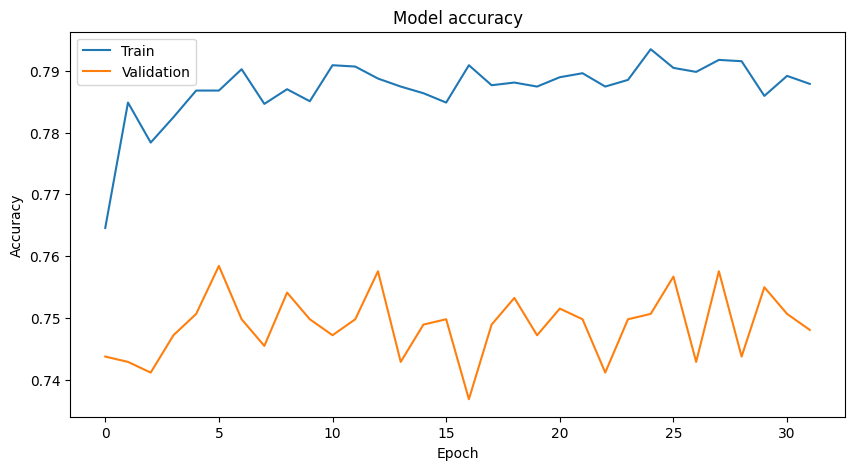

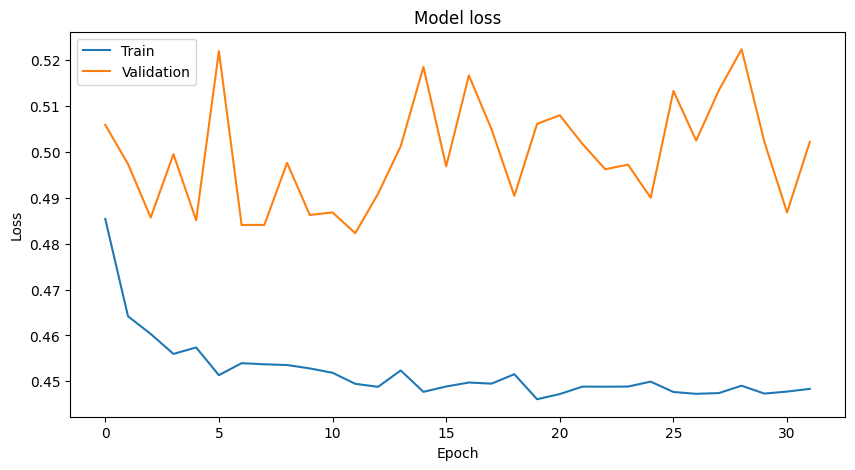

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


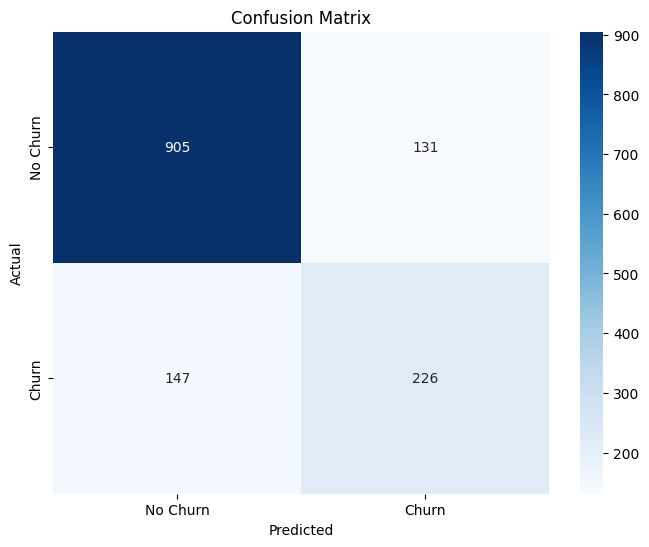

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred_classes are already defined from your model's prediction

conf_matrix = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
